# Evaly liquid money calculator

In [1]:
using Printf

using JSON
using Plots

# parse the product list from json file
products = JSON.parsefile("./data/products.json")
no_of_products = count(i -> (i["name"] != ""), products)

@printf("%d products loaded.", no_of_products)

62 products loaded.

## After how many days you start a new campaign?

In [39]:
campaign_duration = parse(Int64, readline())

stdin>  15


15

## How many orders per campaign?

In [3]:
orders = parse(Int64, readline())

stdin>  1000


1000

## How much delivery duration in days

In [25]:
delivery_duration = parse(Int64, readline())

stdin>  45


45

## How many years the business should run

In [5]:
lifetime = parse(Int64, readline()) * 365

stdin>  2


730

In [40]:
# calculate debit / credit in a single campaign
debit_per_campaign = 0
credit_per_campaign = 0
i = no_of_products

while i <= orders
    for product in products
        debit_per_campaign += parse(Int64, product["offer_price"])
        credit_per_campaign += parse(Int64, product["regular_price"])
    end
    
    i += no_of_products
end

@printf("Customers gave %d and we need to manage %d", debit_per_campaign, credit_per_campaign)

Customers gave 82140464 and we need to manage 135238480

In [52]:
x = []
y = []
bank = i = j = total_campaigns = total_delivery = 0

while i <= lifetime
    # take orders
    bank += debit_per_campaign
    
    # deliver the products
    if j + delivery_duration <= i
        bank -= credit_per_campaign
        
        total_delivery += 1
        j += delivery_duration
    end
    
    append!(x, i)
    append!(y, bank)
    
    total_campaigns += 1
    i += campaign_duration
end

for n in total_delivery:total_campaigns
    i += campaign_duration
    bank -= credit_per_campaign
    
    append!(x, i)
    append!(y, bank)
end

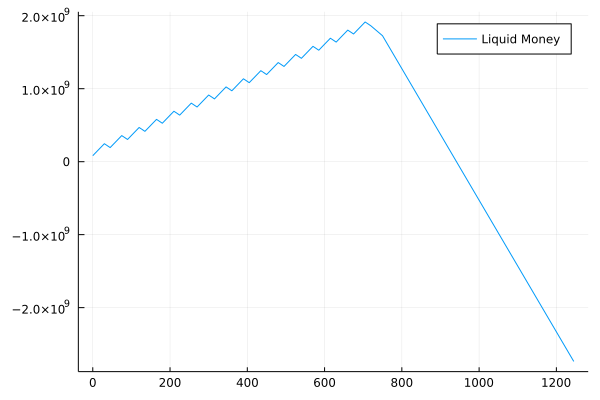

In [53]:
plot(x, y, label="Liquid Money")